In [3]:
import zipfile

# Caminho do arquivo enviado
zip_path = "/content/archive.zip"
extract_path = "/content/alzheimers_dataset"

# Descompactar o zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Arquivos extraídos em:", extract_path)

Arquivos extraídos em: /content/alzheimers_dataset


In [4]:
import os

# Listar arquivos na pasta extraída
for root, dirs, files in os.walk("/content/alzheimers_dataset"):
    for file in files:
        print(os.path.join(root, file))

/content/alzheimers_dataset/alzheimers_prediction_dataset.csv


In [5]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("/content/alzheimers_dataset/alzheimers_prediction_dataset.csv")

# Visualizar as primeiras linhas
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [6]:
# Ver informações sobre colunas, tipos de dados, valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

#🧠 Variável-Alvo (Target)
A coluna Alzheimer’s Diagnosis parece ser a que indica se a pessoa tem ou não Alzheimer — essa vai ser nossa variável-alvo para a classificação binária.

## 🧩 Algumas colunas interessantes:
Demográficas: Country, Age, Gender

Saúde: BMI, Diabetes, Hypertension, Alcohol Consumption, Smoking Status

Estilo de Vida: Physical Activity Level, Dietary Habits, Air Pollution Exposure, Stress Levels

Genética: Risk Factor (APOE-ε4 allele)

Social: Income Level, Employment Status, Urban vs Rural Living

In [7]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


##✅ Próximo Passo: Verificar valores ausentes
Vamos ver se tem dados faltando que precisam ser tratados:

In [8]:
# Verificar valores ausentes
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
Education Level,0
BMI,0
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,0
Hypertension,0


# ✅ prepararando os dados para o modelo
##1. Converter a variável-alvo (Diagnosis)
Transformar Alzheimer’s Diagnosis de "Yes"/"No" para 1/0:

In [9]:
df["Alzheimer’s Diagnosis"] = df["Alzheimer’s Diagnosis"].map({"No": 0, "Yes": 1})

##2. Codificar variáveis categóricas
Para variáveis como Gender, Country, Smoking Status, etc., usaremos One-Hot Encoding:

In [10]:
# Separar variável alvo
target = "Alzheimer’s Diagnosis"

# Guardar X e y
X = df.drop(columns=[target])
y = df[target]

# One-Hot Encoding das colunas categóricas automaticamente
X = pd.get_dummies(X, drop_first=True)

##3. Separar em treino e teste
Usamos train_test_split do scikit-learn:

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#🚀 Agora com os dados prontos (codificados, divididos e organizados), a gente pode seguir para o treinamento com PyTorch.

##🔢 Etapa 4: Normalizar os dados
A normalização ajuda bastante o modelo a convergir. Vamos aplicar a padronização (Z-score):

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##🔁 Etapa 5: Transformar em Tensores PyTorch
Agora transformamos os dados em tensores para usar no modelo:

In [13]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Converter para tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Criar DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

#🧠 Etapa 6.1: Criar o modelo de Regressão Logística
Usamos o nn.Module do PyTorch para definir o modelo. Ele vai ter:

Uma única camada linear (porque é um problema de classificação binária)

Uma função sigmoide pra gerar probabilidades

In [14]:
import torch.nn as nn

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

# Instanciar o modelo
input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)

#⚙️ Etapa 6.2: Função de perda e otimizador
Como estamos fazendo classificação binária, vamos usar a função de perda BCELoss (Binary Cross Entropy) e o otimizador SGD (gradiente descendente estocástico).

In [15]:
import torch.optim as optim

# Função de perda
criterion = nn.BCELoss()

# Otimizador
optimizer = optim.SGD(model.parameters(), lr=0.01)


#🔁 Etapa 6.3: Treinar o modelo
Vamos iterar sobre os dados por algumas épocas, calcular a perda (loss), fazer a retropropagação e atualizar os pesos. Aqui está um código simples para isso:

In [16]:
# Treinar o modelo
n_epochs = 100

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        # Zerar os gradientes anteriores
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calcular perda
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Atualizar pesos
        optimizer.step()

        running_loss += loss.item()

    # Mostrar a loss média da época
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Época {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Época 1/100, Loss: 0.5694
Época 10/100, Loss: 0.5427
Época 20/100, Loss: 0.5428
Época 30/100, Loss: 0.5425
Época 40/100, Loss: 0.5426
Época 50/100, Loss: 0.5429
Época 60/100, Loss: 0.5424
Época 70/100, Loss: 0.5425
Época 80/100, Loss: 0.5425
Época 90/100, Loss: 0.5425
Época 100/100, Loss: 0.5428



#📊 Etapa 7: Avaliar o modelo
Agora vamos ver como ele se saiu nos dados de teste. A gente vai calcular:

Acurácia

Precisão

Recall

F1-score

E também uma matriz de confusão



#📌 Código para avaliação:

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Colocar o modelo em modo avaliação
model.eval()

# Fazer previsões no conjunto de teste
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs >= 0.5).float()

# Converter para numpy
y_true_np = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()

# Calcular métricas
acc = accuracy_score(y_true_np, y_pred_np)
prec = precision_score(y_true_np, y_pred_np)
rec = recall_score(y_true_np, y_pred_np)
f1 = f1_score(y_true_np, y_pred_np)
cm = confusion_matrix(y_true_np, y_pred_np)

print(f"Acurácia: {acc:.4f}")
print(f"Precisão: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Matriz de Confusão:")
print(cm)


Acurácia: 0.7154
Precisão: 0.6731
Recall: 0.6051
F1-Score: 0.6373
Matriz de Confusão:
[[6915 1804]
 [2424 3714]]


##✅ Acurácia: 71,5%
O modelo acerta 71,5% dos casos totais — isso inclui quem tem e quem não tem Alzheimer.

Cuidado: se as classes estiverem desbalanceadas, a acurácia pode ser enganosa.

##📍 Precisão: 67,3%
Das pessoas que o modelo disse que têm Alzheimer, 67,3% realmente têm.

Isso é útil quando queremos evitar falsos positivos (diagnosticar alguém sem a doença).

##📍 Recall: 60,5%
Das pessoas que realmente têm Alzheimer, o modelo conseguiu encontrar 60,5%.

Isso é importante quando queremos evitar falsos negativos (deixar alguém com Alzheimer sem diagnóstico).

##📍 F1-Score: 63,7%
Um equilíbrio entre precisão e recall. Mostra que o modelo está razoável nas duas frentes.

##🧮 Matriz de Confusão:
Falsos negativos (segunda linha, primeira coluna): 2424 → gente com Alzheimer que o modelo disse que não tem 😬

Falsos positivos (primeira linha, segunda coluna): 1804 → gente sem Alzheimer que o modelo disse que tem

#📊 Etapa 8: Visualizações e Análises Extras
Vamos fazer:

✅ Matriz de confusão com gráfico

✅ Curva ROC e área sob a curva (AUC)

✅ Análise de importância das features (mesmo em regressão

#🎯 1. Matriz de Confusão Visual

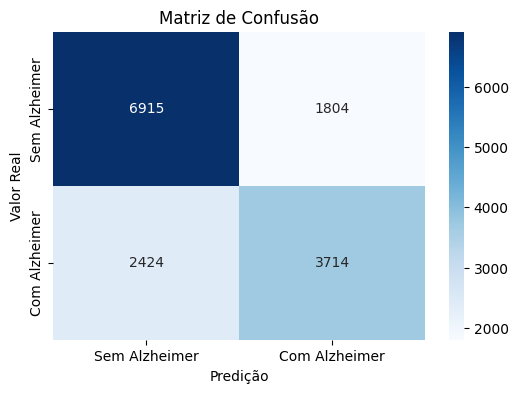

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sem Alzheimer", "Com Alzheimer"], yticklabels=["Sem Alzheimer", "Com Alzheimer"])
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")
plt.show()


#📈 2. Curva ROC e AUC

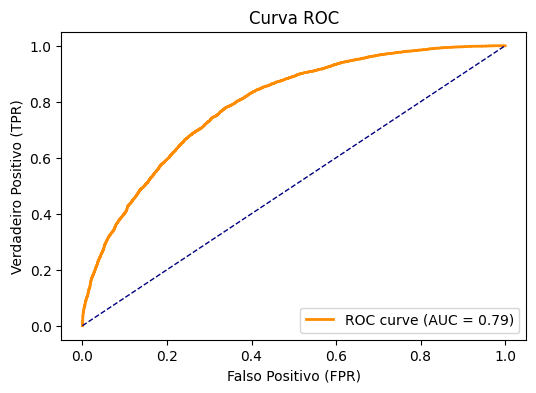

In [21]:
from sklearn.metrics import roc_curve, auc

# Obter probabilidades como numpy
y_probs_np = y_pred_probs.numpy()

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_true_np, y_probs_np)
roc_auc = auc(fpr, tpr)

# Plotar curva
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel("Falso Positivo (FPR)")
plt.ylabel("Verdadeiro Positivo (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


#🧠 3. "Importância" das Features
Em regressão logística, os pesos aprendidos têm um significado interpretável:

In [22]:
# Acessar pesos do modelo
feature_names = X.columns
weights = model.linear.weight.detach().numpy().flatten()

# Juntar nome e peso
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Peso": weights
}).sort_values(by="Peso", key=abs, ascending=False)

# Mostrar top 10
feature_importance.head(10)

,Feature,Peso
0,Age,1.054930
46,Genetic Risk Factor (APOE-ε4 allele)_Yes,0.505245
33,Family History of Alzheimer’s_Yes,0.384289
15,Country_Russia,0.158395
10,Country_India,0.126733
17,Country_South Africa,0.124529
5,Country_Brazil,0.119509
13,Country_Mexico,0.105708
12,Country_Japan,-0.087922
20,Country_Sweden,-0.076630


#📊 Gráfico: Importância das Features

<ipython-input-23-95709852a5d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


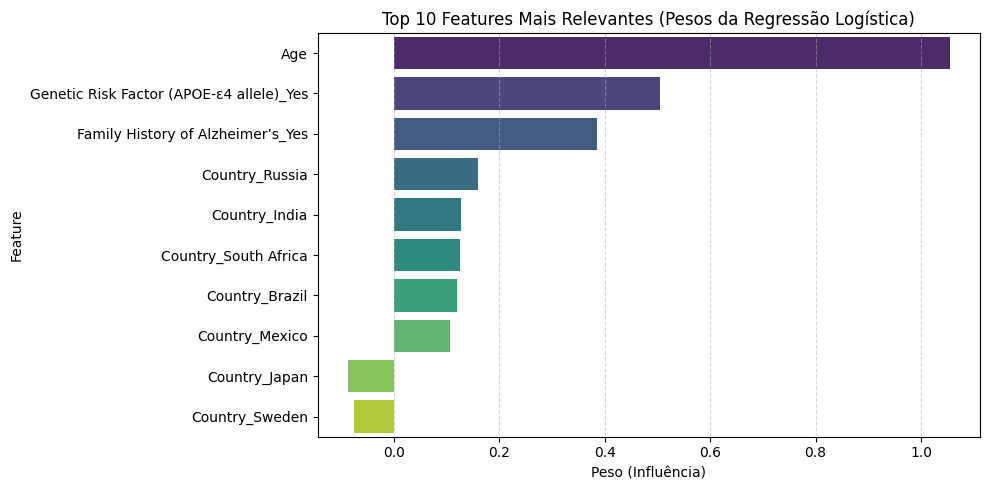

In [23]:
# Plotar gráfico das top 10 features mais importantes
plt.figure(figsize=(10, 5))
sns.barplot(
    x=feature_importance["Peso"].head(10),
    y=feature_importance["Feature"].head(10),
    palette="viridis"
)
plt.title("Top 10 Features Mais Relevantes (Pesos da Regressão Logística)")
plt.xlabel("Peso (Influência)")
plt.ylabel("Feature")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()